In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [43]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Student Performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [44]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [45]:
df['math score'][df['math score']=='?']=np.nan

In [46]:
df['math score']=df['math score'].astype('float64')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   957 non-null    float64
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [48]:
df.fillna(df['reading score'].mean())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [49]:
df['math score'].fillna(df['math score'].mean(),inplace=True)
df['reading score'].fillna(df['reading score'].mean(),inplace=True)
df['writing score'].fillna(df['writing score'].mean(),inplace=True)

In [50]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

*2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them*

In [51]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


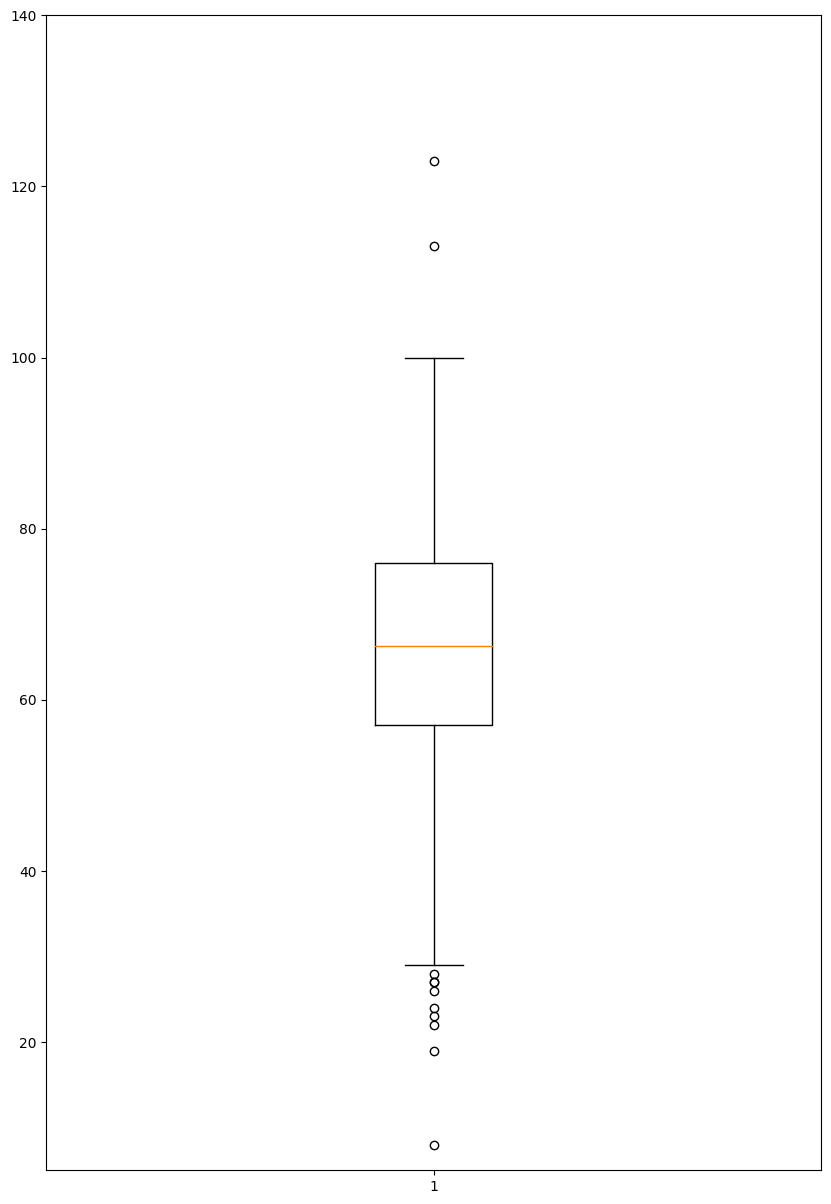

In [52]:
plt.figure(figsize=(10,15))
plt.boxplot(df['math score'])
plt.ylim(5, 140)  # Adjust the range as needed
plt.show()

In [53]:
px.box(df['math score'])

In [54]:
Q1=df['math score'].quantile(0.25)
Q3=df['math score'].quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df1=df[(df['math score']>lower) & (df['math score']<=upper)]

In [55]:
px.box(df1['math score'])